In [39]:
from google.colab import files
import pandas as pd
import io
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [20]:
# Mengimport datasets iris dan mengubah ke bentuk dataframe
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
# Membuang kolom ID karena tidak ada hubungannya dengan kelas/label
df = df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# Melakukan one hot encoding karena label merupakan data kategorikal
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [25]:
# Menggabungkan kolom hasil one hot encoding dan membuang kolom spesies
new_df = pd.concat([df,category], axis = 1)
new_df = new_df.drop(columns = 'Species')
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [26]:
# Mengonversi dataframe menjadi array agar model dapat memprosesnya
datasets = new_df.values
datasets

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [31]:
# Memisahkan datasets antara atribut dengan label
atribut = datasets[:,0:4]
label = datasets[:,4:7]

In [ ]:
# Melakukan normalisasi data agar data dapat dipelajari dengan baik oleh model
min_max_scaler = preprocessing.MinMaxScaler()
atribut_scale = min_max_scaler.fit_transform(atribut)
atribut_scale

In [33]:
# Memisah datasets menjadi data training dan data uji
x_train, x_test, y_train, y_test = train_test_split(atribut, label, test_size = 0.3)

In [34]:
# Membuat model neural network dengan 3 layer
model = Sequential([
          Dense(units = 64, activation='relu',input_shape = (4,)),
          Dense(units = 64, activation = 'relu'),
          Dense(3, activation = 'softmax')
])
# Catatan : Softmax cocok dipakai untuk klasifikasi multi kelas

In [35]:
# Menentukan optimizer dan loss function pada model
model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
# Catatan : categorical_crossentropy cocok untuk masalah multi kelas

In [ ]:
# Memberikan pelajaran mesin dari datasets yang sudah di preprocessing
history = model.fit(
    x_train,
    y_train,
    epochs = 100
)
# objek history akan menampung informasi dari loss model dan akurasi pada setiap epoch

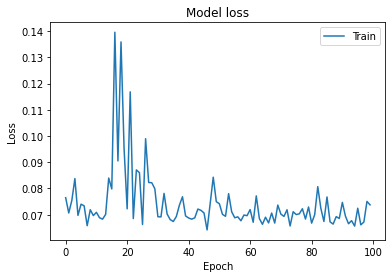

In [45]:
# Melakukan plot dari objek history untuk melihat loss di tiap epochs
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper right')
plt.show()

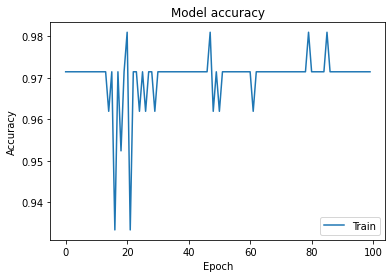

In [46]:
# Melakukan plot dari objek history untuk melihat akurasi di tiap epochs
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'lower right')
plt.show()